In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')


# Load dataset

In [2]:
df = pd.read_csv("Telco_Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df = df.drop("customerID", axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# EDA

In [4]:
# dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
# Dataset Shape
print(df.shape)

(7043, 20)


In [6]:
#Missing Values
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
#Summary Statistics
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


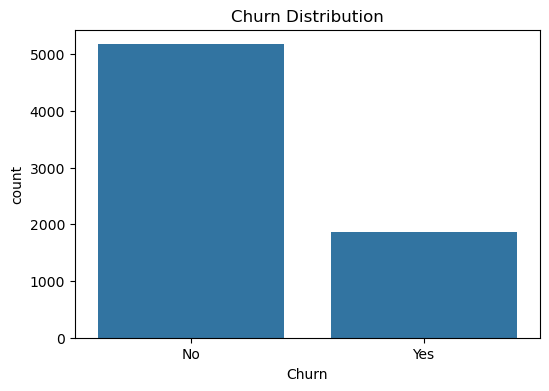

In [8]:
# Churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

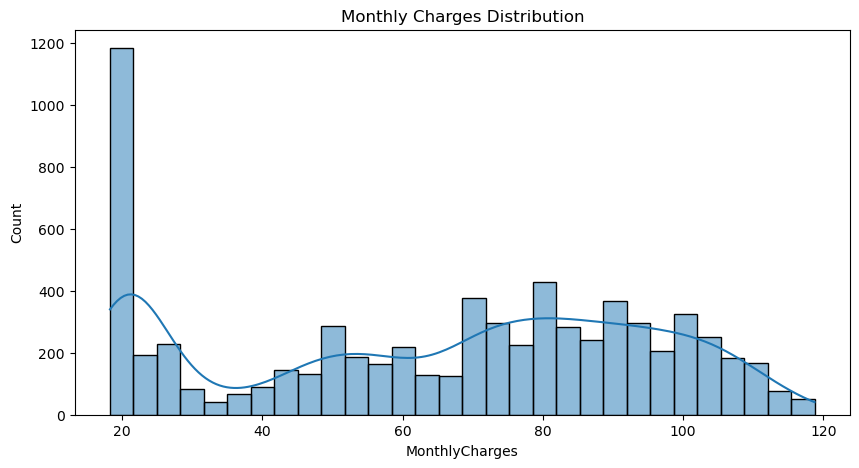

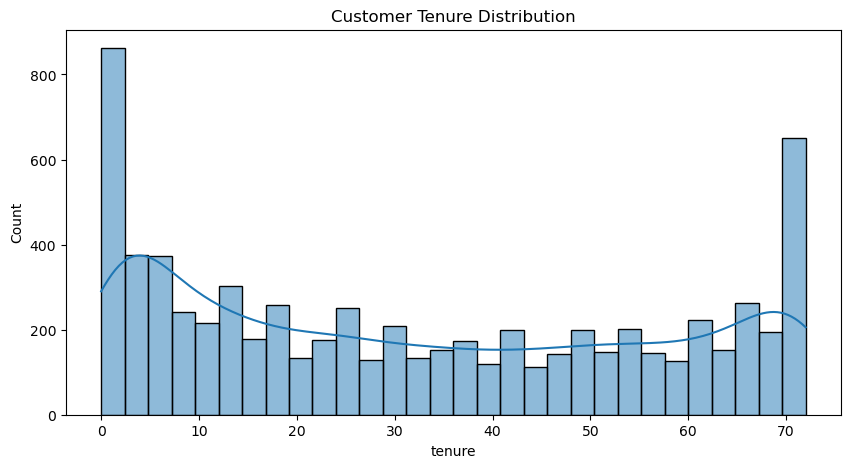

In [9]:
# Some key feature distributions
plt.figure(figsize=(10,5))
sns.histplot(df['MonthlyCharges'], kde=True, bins=30)
plt.title('Monthly Charges Distribution')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['tenure'], kde=True, bins=30)
plt.title('Customer Tenure Distribution')
plt.show()

# Preprocessing

In [10]:
# Convert categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [11]:
# Features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
 2142       0              0        0           1      21             1   
 1623       0              0        0           0      54             1   
 6074       1              0        1           0       1             0   
 1362       1              0        0           0       4             1   
 6754       1              0        0           1       0             1   
 ...      ...            ...      ...         ...     ...           ...   
 3772       1              0        1           0       1             1   
 5191       0              0        1           1      23             1   
 5226       1              0        1           1      12             1   
 5390       1              1        0           0      12             1   
 860        1              0        0           0      26             1   
 
       MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
 2142              0       

In [13]:
# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train

array([[-1.02516569e+00, -4.37749204e-01, -9.69578591e-01, ...,
         1.33926673e+00, -4.73723375e-04, -1.40800618e+00],
       [-1.02516569e+00, -4.37749204e-01, -9.69578591e-01, ...,
        -1.47094882e+00,  1.07475386e+00,  5.58360318e-01],
       [ 9.75452077e-01, -4.37749204e-01,  1.03137591e+00, ...,
         4.02528212e-01, -1.37649913e+00, -7.02892284e-01],
       ...,
       [ 9.75452077e-01, -4.37749204e-01,  1.03137591e+00, ...,
         4.02528212e-01, -1.45294499e+00, -3.21706651e-01],
       [ 9.75452077e-01,  2.28441306e+00, -9.69578591e-01, ...,
         4.02528212e-01,  1.14953785e+00, -1.53524478e+00],
       [ 9.75452077e-01, -4.37749204e-01, -9.69578591e-01, ...,
        -5.34210304e-01, -1.49781538e+00,  3.30921324e-01]])

In [15]:
X_test

array([[-1.02516569, -0.4377492 ,  1.03137591, ...,  0.40252821,
        -1.33162874, -0.64775556],
       [ 0.97545208, -0.4377492 , -0.96957859, ..., -1.47094882,
        -1.31667194,  1.72630461],
       [-1.02516569, -0.4377492 ,  1.03137591, ...,  1.33926673,
        -1.51277218, -1.69588351],
       ...,
       [ 0.97545208, -0.4377492 ,  1.03137591, ..., -1.47094882,
        -1.49449165, -0.21726497],
       [-1.02516569, -0.4377492 ,  1.03137591, ..., -0.5342103 ,
        -0.69513389, -0.37631322],
       [ 0.97545208, -0.4377492 , -0.96957859, ...,  1.33926673,
        -1.11392424, -0.30156054]])

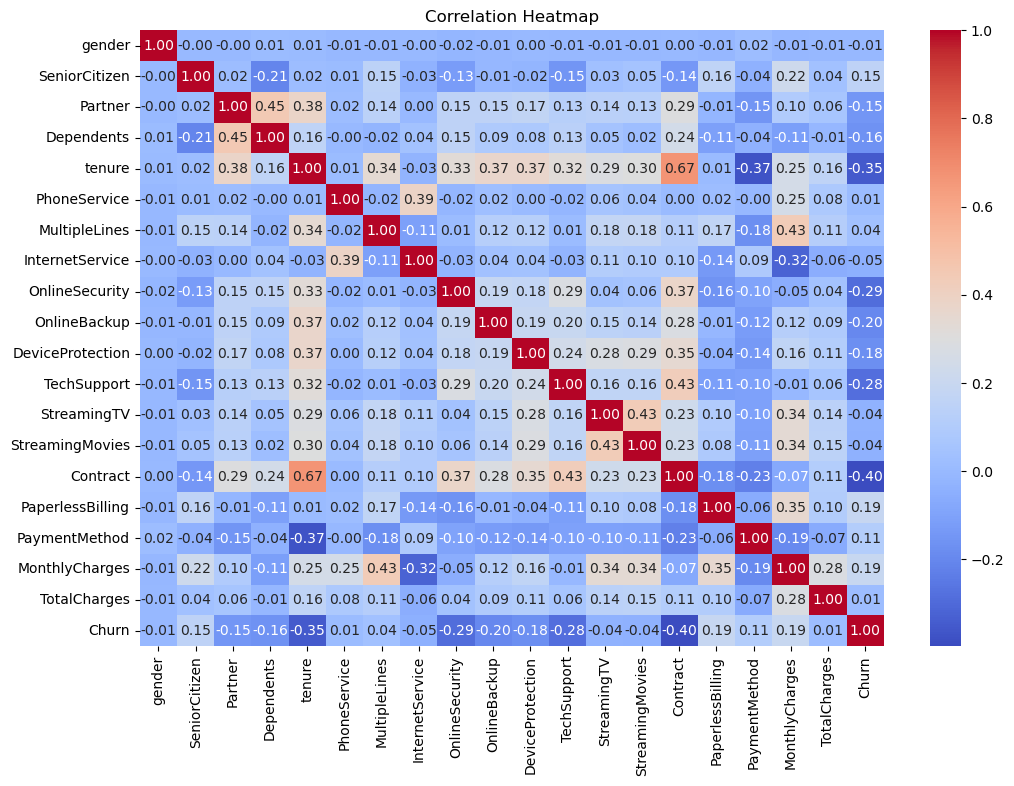

In [18]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# ML Models

In [23]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

# Train and Evaluate Models using Pipeline
results = {}

for name, model in models.items():
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Train model
    pipeline.fit(X_train, y_train)

    # Predict
    y_pred = pipeline.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"{name} Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.8169
Decision Tree Accuracy: 0.7310
Random Forest Accuracy: 0.7942
SVM Accuracy: 0.8070
KNN Accuracy: 0.7729
Naive Bayes Accuracy: 0.7580
Gradient Boosting Accuracy: 0.8119
XGBoost Accuracy: 0.7857


In [24]:
accuracy_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree","Random Forest","SVM","KNN","Naive Bayes","Gradient Boosting","XGBoost"],
    "Accuracy": [0.8169, 0.7225, 0.7977, 0.8070, 0.7729, 0.7580, 0.8119, 0.7857]
})

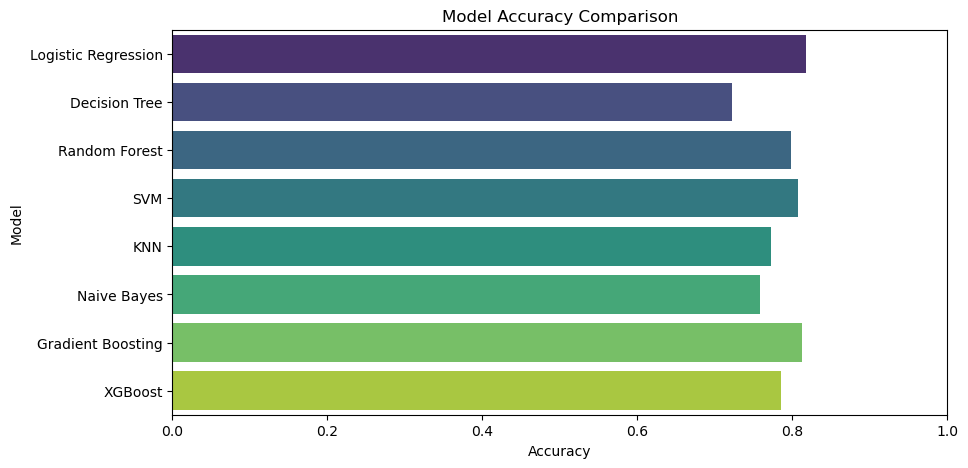

In [25]:
# Optional: Accuracy Bar Plot
plt.figure(figsize=(10,5))
sns.barplot(x="Accuracy", y="Model", data=accuracy_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.xlim(0,1)
plt.show()

In [26]:
# Detailed Classification Report for Selected Model

selected_model = "Random Forest"  # Change to any model name
print(f"\n\n Detailed Report for {selected_model} \n")
model = models[selected_model]
#model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))




 Detailed Report for Random Forest 

Confusion Matrix:
[[941  95]
 [195 178]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.48      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [27]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy:.4f}")

Confusion Matrix:
[[941  95]
 [195 178]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.48      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Accuracy: 0.7857


In [28]:
best_model_name = accuracy_df.iloc[0]['Model']
best_model_accuracy = accuracy_df.iloc[0]['Accuracy']

print(f"\n\n Best Model: {best_model_name} with Accuracy = {best_model_accuracy:.4f}")

best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)




 Best Model: Logistic Regression with Accuracy = 0.8169
